# GaussianNB and MultinomialNB model
## With «balance-scale» DataSet

## About DataSet
### Description:
This data set was generated to model psychological experimental results. Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight). If they are equal, it is balanced

### Download:
[LINK](https://archive.ics.uci.edu/ml/datasets/Balance+Scale)

### Import all needed modules

In [1]:
import pandas as pd

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

### Let's watch head of DataSet

In [2]:
data = pd.read_csv('balance-scale.data', header=None)
data.head(10)

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
5,R,1,1,2,1
6,R,1,1,2,2
7,R,1,1,2,3
8,R,1,1,2,4
9,R,1,1,2,5


### And describe

In [3]:
data.describe()

,1,2,3,4
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


### And correlations

In [4]:
data.corr()

,1,2,3,4
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0


In [5]:
data.dtypes

0    object
1     int64
2     int64
3     int64
4     int64
dtype: object

### We can see a some nuances

- NB-models work right with categorial data. Our DataSet is not caty, but we can to change it
- NB-models love no correlations between features. And we have it
- There are no NaN data in our DS

### Make CATy

Go watch to DataSet and make a decision:
Which of these features we can remake in CATy?

In [6]:
for i in range(len(data.columns)):
    print('{}\t{}'.format(i, data[i].unique()))

0	['B' 'R' 'L']
1	[1 2 3 4 5]
2	[1 2 3 4 5]
3	[1 2 3 4 5]
4	[1 2 3 4 5]


I think, we can do it for all

In [7]:
for i in range(len(data.columns)):
    data[i] = data[i].astype('category')
    
data.dtypes

0    category
1    category
2    category
3    category
4    category
dtype: object

### Make Target data

it is easy

In [8]:
target = data[0]

### Check dummy-test

If we have a lot of on of classes
We need to make dummy-test to find minimal percent of our classifier

This is dict of counts every class

In [9]:
c = Counter(target)
c_dict = dict(c)
print(c_dict)

{'B': 49, 'R': 288, 'L': 288}


Calculating of minimal percent

In [10]:
dummy_perc = max(c_dict.values()) / sum(c_dict.values())
print(dummy_perc)

0.4608


Ok, it's good

### Dropping Target column from Data

In [11]:
data = data.drop(0, axis=1)
data.head(10)

,1,2,3,4
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5
5,1,1,2,1
6,1,1,2,2
7,1,1,2,3
8,1,1,2,4
9,1,1,2,5


### Separating Data's

I chose test_size=32 to make 200 for test shape
And minimal mistake wiil be — 5%

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.32, random_state=27)

print('Shape of X_train:\t{}'.format(X_train.shape))
print('Shape of X_test:\t{}'.format(X_test.shape))

Shape of X_train:	(425, 4)
Shape of X_test:	(200, 4)


## Nude GaussianNB

In [13]:
gnb_nude = GaussianNB()
gnb_nude.fit(X_train, y_train)

train_score = gnb_nude.score(X_train, y_train)
test_score = gnb_nude.score(X_test, y_test)

print('Train score:\t{:.3f}'.format(train_score))
print('Test score:\t{:.3f}'.format(test_score))

Train score:	0.906
Test score:	0.900


Nice score!

## Nude MultinomialNB

In [14]:
mnb_nude = MultinomialNB()
mnb_nude.fit(X_train, y_train)

train_score = mnb_nude.score(X_train, y_train)
test_score = mnb_nude.score(X_test, y_test)

print('Train score:\t{:.3f}'.format(train_score))
print('Test score:\t{:.3f}'.format(test_score))

Train score:	0.887
Test score:	0.855


Good, but Gaussian was better ^\_\_\_\_\_^

## Loop MultinomialNB → alpha

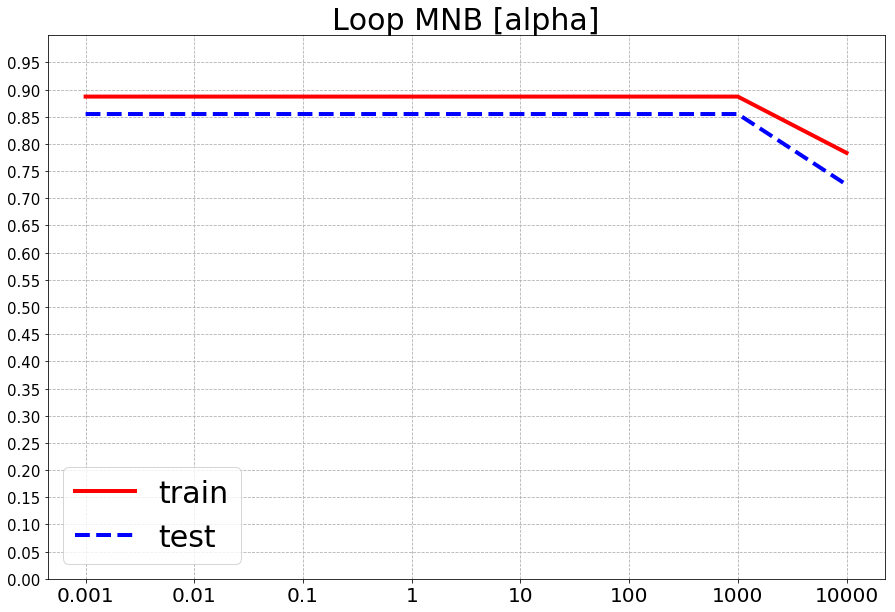

In [16]:
# =============
# List of alpha
# =============
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# ===========
# Empty lists
# ===========

train_score_list = []
test_score_list = []

# ====
# loop
# ====

for a in alpha_list:
    model = MultinomialNB(alpha=a)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

# ====
# Plot
# ====

plt.figure(figsize=(15,10))    
plt.plot(train_score_list, 'r-', label='train', linewidth=4)
plt.plot(test_score_list, 'b--', label='test', linewidth=4)
plt.ylim(top=1, bottom=0)
plt.grid(linestyle='--')
plt.xticks(np.arange(len(alpha_list)), tuple(alpha_list), fontsize=20)
plt.yticks(np.arange(0, 1, 0.05), fontsize=15)
plt.legend(loc=3, prop={'size':30})
plt.title('Loop MNB [alpha]', fontsize=30)
plt.show()

## Campionship between GNB and MNB

In [17]:
# ======
# Models
# ======

gnb_best = GaussianNB()
mnb_best = MultinomialNB(alpha=1000)

# List of models
models_list = [gnb_best, mnb_best]

# ===============
# Empty variables
# ===============

best_train_score = 0
best_train_score_on_test = 0
best_train_model_name = None

best_test_score_on_train = 0
best_test_score = 0
best_test_model_name = None

# =========
# Main loop
# =========

for model in models_list:
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    if train_score > best_train_score:
        best_train_score = train_score
        best_train_score_on_test = test_score
        best_train_model_name = type(model).__name__
    
    if test_score > best_test_score:
        best_test_score_on_train = train_score
        best_test_score = test_score
        best_test_model_name = type(model).__name__
        
# =============
# Print results
# =============

print('= BEST TRAIN MODEL:\t{}'.format(best_train_model_name))
print('Train score:\t\t{:.3f}'.format(best_train_score))
print('Test score:\t\t{:.3f}'.format(best_train_score_on_test), end='\n\n')

print('= BEST TEST MODEL:\t{}'.format(best_test_model_name))
print('Train score:\t\t{:.3f}'.format(best_test_score_on_train))
print('Test score:\t\t{:.3f}'.format(best_test_score))

= BEST TRAIN MODEL:	GaussianNB
Train score:		0.906
Test score:		0.900

= BEST TEST MODEL:	GaussianNB
Train score:		0.906
Test score:		0.900


![gif](giphy.gif)